# Record Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("bollywood.csv")
df.shape

(149, 10)

# Records Present in the Data

In [2]:
len(df)

149

# MetaData Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


# How many movies got released in each genre? Which genre had highest number of releases? Sort number of releases in each genre in descending order.

In [4]:
a=df['Genre'].value_counts()
print(a.max)
a.index[0]

<bound method NDFrame._add_numeric_operations.<locals>.max of Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64>


'Comedy'

# How many movies in each genre got released in different release times like long weekend, festive season, etc.

In [5]:
b=df.groupby(["Genre","ReleaseTime"])

In [6]:
d=dict(b.groups)
k=d.keys()
for i in k:
    print(i,' '*5,len(b.get_group(i)))

(' Drama ', 'FS')       4
(' Drama ', 'HS')       6
(' Drama ', 'LW')       1
(' Drama ', 'N')       24
('Action', 'FS')       3
('Action', 'HS')       3
('Action', 'LW')       3
('Action', 'N')       12
('Action ', 'N')       3
('Comedy', 'FS')       3
('Comedy', 'HS')       5
('Comedy', 'LW')       5
('Comedy', 'N')       23
('Romance', 'FS')       3
('Romance', 'HS')       3
('Romance', 'LW')       4
('Romance', 'N')       15
('Thriller', 'FS')       4
('Thriller', 'HS')       1
('Thriller', 'LW')       1
('Thriller', 'N')       20
('Thriller ', 'LW')       1
('Thriller ', 'N')       2


In [7]:
df.groupby(["Genre","ReleaseTime"])["MovieName"].count()

Genre      ReleaseTime
 Drama     FS              4
           HS              6
           LW              1
           N              24
Action     FS              3
           HS              3
           LW              3
           N              12
Action     N               3
Comedy     FS              3
           HS              5
           LW              5
           N              23
Romance    FS              3
           HS              3
           LW              4
           N              15
Thriller   FS              4
           HS              1
           LW              1
           N              20
Thriller   LW              1
           N               2
Name: MovieName, dtype: int64

# Note: Do a cross tabulation between Genre and ReleaseTime.

In [8]:
pd.crosstab(index=df["Genre"],columns=df["ReleaseTime"])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


In [9]:
s=list(df["Release Date"])

In [10]:
year=[]
month=[]
for i in s:
    l=str(i).split('-')
    month.append(l[1])
    year.append((l[-1]))
df["Month"]=month
df["Year"]=year

In [11]:
df["Year"].value_counts()

14    70
13    67
15    12
Name: Year, dtype: int64

In [12]:
df["Month"].value_counts()

Jan    20
Mar    19
May    18
Jul    16
Feb    16
Apr    11
Sep    10
Jun    10
Nov    10
Oct     9
Aug     8
Dec     2
Name: Month, dtype: int64

In [13]:
f=df.groupby(["Year","Month"])
g=dict(f.groups)
ke=g.keys()
p=-1
mx=-1
ys=set()

for i in ke:
    ys.add(i[0])
ys=list(ys)
ys.sort()
for j in ys:
    mx=-1
    p=-1
    for i in ke:
        if(len(f.get_group(i))>mx and i[0]==j):
            mx=len(f.get_group(i))
            p=i[1]
    print(p)
print()
for i in ke:
    print(i,' ',len(f.get_group(i)))

Jul
May
Jan

('13', 'Apr')   5
('13', 'Aug')   4
('13', 'Feb')   6
('13', 'Jan')   8
('13', 'Jul')   9
('13', 'Jun')   5
('13', 'Mar')   8
('13', 'May')   6
('13', 'Nov')   5
('13', 'Oct')   6
('13', 'Sep')   5
('14', 'Apr')   6
('14', 'Aug')   4
('14', 'Dec')   2
('14', 'Feb')   6
('14', 'Jan')   7
('14', 'Jul')   7
('14', 'Jun')   5
('14', 'Mar')   8
('14', 'May')   12
('14', 'Nov')   5
('14', 'Oct')   3
('14', 'Sep')   5
('15', 'Feb')   4
('15', 'Jan')   5
('15', 'Mar')   3


# Coverting Release Date into Datetime Data Type

In [14]:
df["Release Date"]=pd.to_datetime(df["Release Date"])

In [15]:
df["Release Date"]

0     2014-04-18
1     2013-01-04
2     2014-07-18
3     2013-01-04
4     2014-07-04
         ...    
144   2015-02-27
145   2015-03-13
146   2015-03-20
147   2015-03-20
148   2014-05-23
Name: Release Date, Length: 149, dtype: datetime64[ns]

In [16]:
df['Year1']=df["Release Date"].dt.year

In [17]:
df['Month1']=df["Release Date"].dt.month

In [18]:
df['Month1'].mode()

0    1
dtype: int64

In [19]:
df['Year1']

0      2014
1      2013
2      2014
3      2013
4      2014
       ... 
144    2015
145    2015
146    2015
147    2015
148    2014
Name: Year1, Length: 149, dtype: int64

In [20]:
pd.crosstab(index=df["Year1"],columns=df["Month1"],margins=True)

Month1,1,2,3,4,5,6,7,8,9,10,11,12,All
Year1,,,,,,,,,,,,,
2013,8,6,8,5,6,5,9,4,5,6,5,0,67
2014,7,6,8,6,12,5,7,4,5,3,5,2,70
2015,5,4,3,0,0,0,0,0,0,0,0,0,12
All,20,16,19,11,18,10,16,8,10,9,10,2,149


# Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?


In [21]:
df[df.Budget>=30]["Month1"].value_counts().max

<bound method NDFrame._add_numeric_operations.<locals>.max of 2     8
8     7
1     6
11    6
6     5
7     5
9     4
10    4
4     3
3     3
5     3
12    2
Name: Month1, dtype: int64>

MONTH FEB(2) HAS MOST RELEASES OF HIGH BUDGET MOVIES

In [22]:
df['Budget']

0       36
1       10
2       10
3        7
4       18
      ... 
144     15
145     13
146     32
147      5
148    150
Name: Budget, Length: 149, dtype: int64

# Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.

In [23]:
df["ROI"]=(df["BoxOfficeCollection"]-df['Budget'])/df['Budget']

In [24]:
A=df["ROI"].sort_values().tail(10)
A

115    4.266667
101    4.466667
37     5.500000
128    5.666667
58     5.933333
87     6.240000
135    7.500000
132    7.514286
89     7.647059
64     8.166667
Name: ROI, dtype: float64

In [25]:
for i in A.index:
    print(df.loc[i,"MovieName"])

Chennai Express
Bhaag Milkha Bhaag
Humpty Sharma Ki Dulhania
Shahid
Mary Kom
Fukrey
The Lunchbox
Grand Masti
PK
Aashiqui 2


# Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.

In [26]:
df.groupby(["ReleaseTime"]).ROI.mean()

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

LONG WEEKENDS HAS HIGHEST ROI

# Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot to conclude if the most movies are high or low budgeted movies.

(array([64., 40., 19., 11.,  4.,  4.,  2.,  2.,  1.,  2.]),
 array([  2. ,  16.8,  31.6,  46.4,  61.2,  76. ,  90.8, 105.6, 120.4,
        135.2, 150. ]),
 <BarContainer object of 10 artists>)

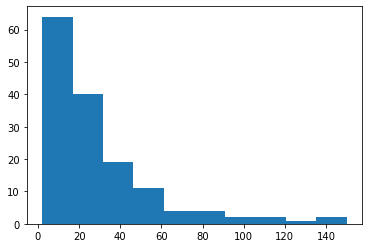

In [27]:
plt.hist(df["Budget"])

In [28]:
import seaborn as sb

C:\Users\Siva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Budget', ylabel='Density'>

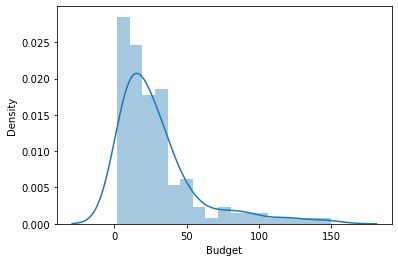

In [29]:
sb.distplot(df["Budget"])

Most movies are less than or equal to 20 Crore Budget

# Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROIs?

In [30]:
F=df[df["Genre"]=="Comedy"]["ROI"]
D=df[df["Genre"]==" Drama "]["ROI"]

In [31]:
F.mean()

0.7883937023544075

In [32]:
D.mean()

1.3574554352126598

C:\Users\Siva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Siva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


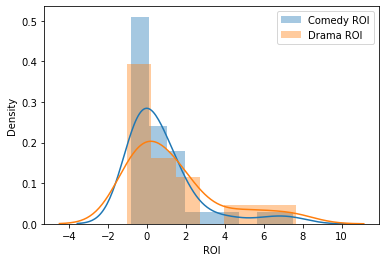

In [45]:
sb.distplot(df[df["Genre"]=="Comedy"]["ROI"],label="Comedy ROI")
sb.distplot(df[df["Genre"]==" Drama "]["ROI"],label="Drama ROI")
plt.legend()

# Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

In [46]:
df["BoxOfficeCollection"].corr(df["YoutubeLikes"])

0.6825165877731297

somewhat good relation

# Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

<AxesSubplot:xlabel='YoutubeLikes', ylabel='Genre'>

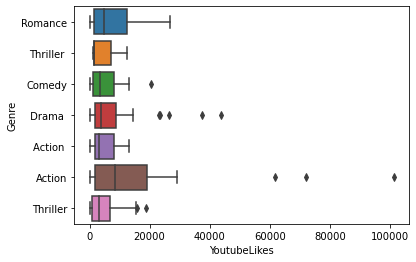

In [49]:
sb.boxplot(data=df, x='YoutubeLikes', y='Genre')

actions movies have typically more youtube likes

# 12.Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap.

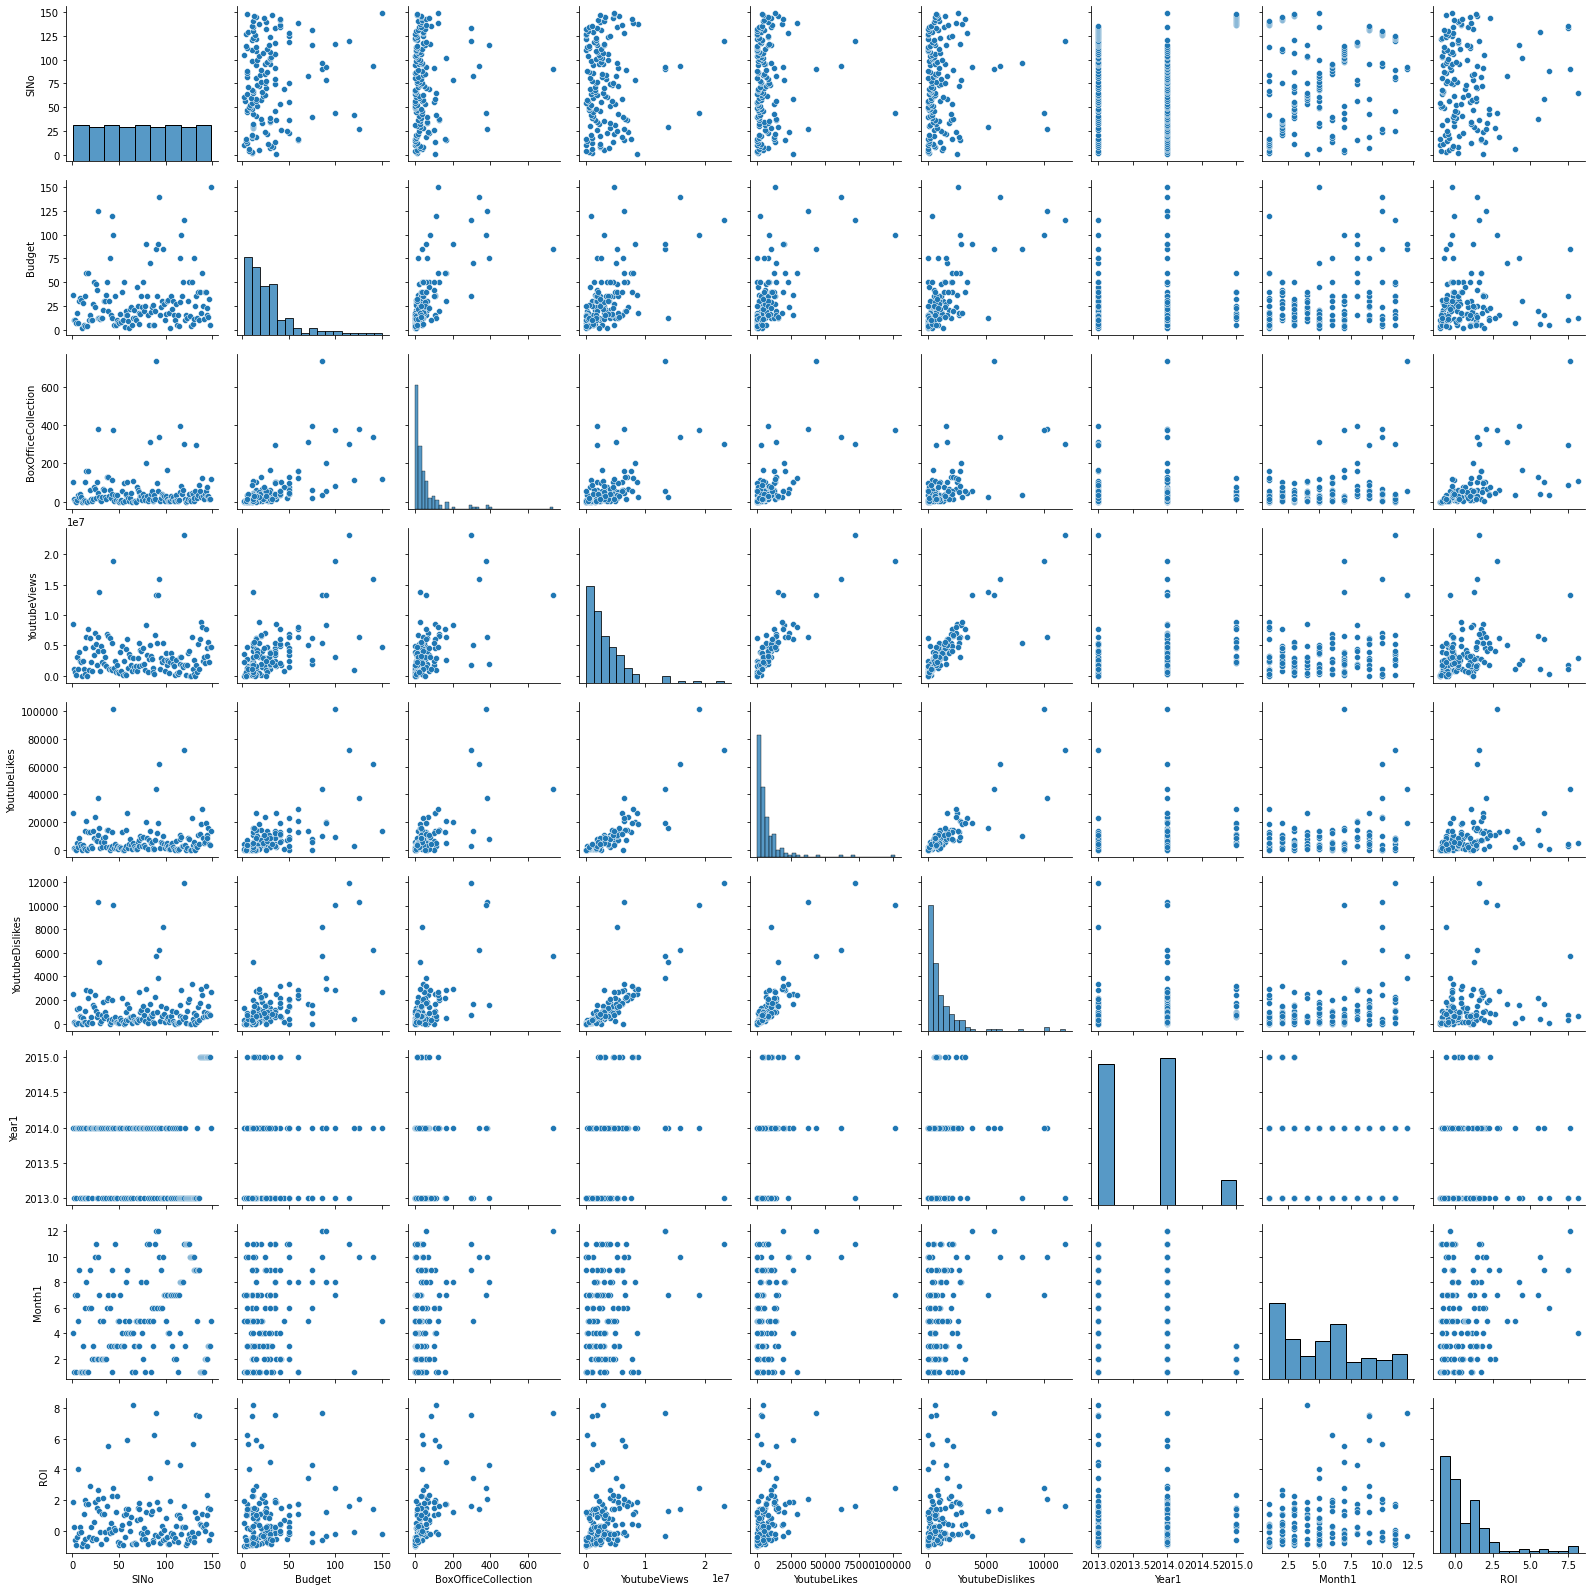

In [50]:
sb.pairplot(df)

In [54]:
df.corr()

,SlNo,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Year1,Month1,ROI
SlNo,1.000000,0.116899,0.036908,0.025027,0.018163,0.035949,0.132755,0.219954,0.037314
Budget,0.116899,1.000000,0.650401,0.589038,0.608916,0.665343,0.062069,0.258457,0.072050
BoxOfficeCollection,0.036908,0.650401,1.000000,0.588632,0.682517,0.623941,0.011673,0.280943,0.585042
YoutubeViews,0.025027,0.589038,0.588632,1.000000,0.884055,0.846739,0.280666,0.289593,0.252847
YoutubeLikes,0.018163,0.608916,0.682517,0.884055,1.000000,0.859730,0.209155,0.267112,0.291302
YoutubeDislikes,0.035949,0.665343,0.623941,0.846739,0.859730,1.000000,0.147098,0.353301,0.201533
Year1,0.132755,0.062069,0.011673,0.280666,0.209155,0.147098,1.000000,-0.214886,-0.081778
Month1,0.219954,0.258457,0.280943,0.289593,0.267112,0.353301,-0.214886,1.000000,0.205995
ROI,0.037314,0.072050,0.585042,0.252847,0.291302,0.201533,-0.081778,0.205995,1.000000
